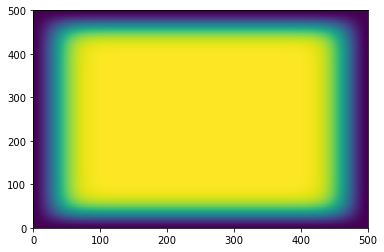

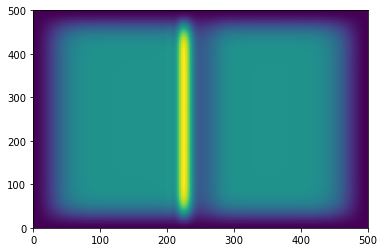

In [19]:
from __future__ import print_function
import numpy as np
import trottersuzuki as ts
from matplotlib import pyplot as plt

grid = ts.Lattice2D(500, 15)  # # create a 2D lattice
#grid = ts.Lattice1D(500, 10)

#potential = ts.HarmonicPotential(grid, 1., 1./np.sqrt(2.))  # create an harmonic potential
#coupling = 1.2097e3
#hamiltonian = ts.Hamiltonian(grid, potential, 1., coupling)  # create the Hamiltonian

#def extern_potential(x):
#    return 0.3*x**4 - x**2 + 0.3*y**4 - y**2 

#def extern_potential(x):
#    return 0.5*x**2
#potential = ts.Potential(grid)
#potential.init_potential(extern_potential)
hamiltonian = ts.Hamiltonian(grid)


#state = ts.GaussianState(grid, 0.05)  # create the initial state
def wave_function(x,y):
    return 1
state = ts.State(grid)
state.init_state(wave_function)

# initialize the solver, 1.e^-4 for delta t (time for each step in the evoluion)
solver = ts.Solver(grid, state, hamiltonian, 1.e-4)   
solver.evolve(10000, True)  # evolve the state towards the ground state

density = state.get_particle_density()
plt.pcolor(density)  # plot the particle denisity
plt.savefig("Flat-Wavefunction.jpg")
plt.show()

def dark_soliton(x,y):  # define phase imprinting that will create the dark soliton
    a = 1.98128
    theta = 1.5*np.pi
    return np.exp(1j* (theta * 0.5 * (1. + np.tanh(-a * x))))

state.imprint(dark_soliton)  # phase imprinting
solver.evolve(1000)  # perform a real time evolution

density = state.get_particle_density()
plt.pcolor(density)  # plot the particle denisity
plt.savefig("Soliton.jpg")
plt.show()